# HOUSE PRICE PREDICTION REGRESSION PROJECT 

# PROJECT GOAL 

## Load Libraries 


In [286]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

## Load dataset


In [287]:
#data set path loaded to train and test it and then find is shape i.e entries and features 
train_data_path=r"F:\AI_FINAL\dataset.csv"
df_train=pd.read_csv(train_data_path)
print("shape of df_train:", df_train.shape)


shape of df_train: (500, 10)


In [288]:
#to see all columns : 
#none is used for all columns veiw 
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [289]:
#to see first 5 entries of trained dataset:
df_train.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,3974,4,4,1,1964,Suburb,Good,3,1283200
1,2,4307,3,3,2,1973,Countryside,Very Good,1,1345509
2,3,1660,3,3,2,1987,Suburb,Poor,2,401100
3,4,2094,2,2,1,1984,Beachside,Good,1,942479
4,5,1930,3,3,1,1998,Downtown,Fair,1,706095


## Know Your Data

In [290]:
df.shape

(500, 9)


## Data Integration


In [291]:
df=pd.concat([df_train])
print("shape of integrated data /data frame :",df.shape)

shape of integrated data /data frame : (500, 10)


In [292]:
df.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,3974,4,4,1,1964,Suburb,Good,3,1283200
1,2,4307,3,3,2,1973,Countryside,Very Good,1,1345509
2,3,1660,3,3,2,1987,Suburb,Poor,2,401100
3,4,2094,2,2,1,1984,Beachside,Good,1,942479
4,5,1930,3,3,1,1998,Downtown,Fair,1,706095


In [293]:
df.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
495,496,4999,5,3,2,1964,Beachside,Fair,3,2509704
496,497,5586,3,1,1,1972,Beachside,Excellent,3,3653208
497,498,1314,3,3,2,1970,Suburb,Good,1,516840
498,499,1563,5,4,2,1976,Suburb,Very Good,2,701448
499,500,705,4,2,2,1951,Suburb,Excellent,3,344880


## Get Brief About Dataset

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         500 non-null    int64 
 1   Area       500 non-null    int64 
 2   Bedrooms   500 non-null    int64 
 3   Bathrooms  500 non-null    int64 
 4   Floors     500 non-null    int64 
 5   YearBuilt  500 non-null    int64 
 6   Location   500 non-null    object
 7   Condition  500 non-null    object
 8   Garage     500 non-null    int64 
 9   Price      500 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 39.2+ KB


In [295]:
int_features=df.select_dtypes(include=["int64"]).columns
print("total number of integer features:",int_features.shape[0])
print("integer features names :",int_features)

total number of integer features: 8
integer features names : Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Garage',
       'Price'],
      dtype='object')


In [296]:
obj_features=df.select_dtypes(include=["object"]).columns
print("total number of categorical features:",obj_features.shape[0])
print("categorical features names :",obj_features)

total number of categorical features: 2
categorical features names : Index(['Location', 'Condition'], dtype='object')


In [297]:
df['Age'] = 2025 - df['YearBuilt']
df = df.drop('YearBuilt', axis=1)
df = df.drop('Id', axis=1)

## Get The Statistical Info Of Numerical Data:

In [298]:
#only non null values are used to fetch the following information :
#count 4000 means that all the values are non null and all are used to calculate the information 
df.describe()

,Area,Bedrooms,Bathrooms,Floors,Garage,Price,Age
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,3005.488000,3.034000,2.714000,1.560000,1.304000,1.223629e+06,39.282000
std,1391.556873,1.258575,1.089301,0.554088,1.064825,7.207483e+05,20.657394
min,604.000000,1.000000,1.000000,1.000000,0.000000,1.648350e+05,3.000000
25%,1839.500000,2.000000,2.000000,1.000000,0.000000,7.012080e+05,22.000000
50%,2939.500000,3.000000,3.000000,2.000000,1.000000,1.043777e+06,39.000000
75%,4042.500000,4.000000,4.000000,2.000000,2.000000,1.578897e+06,56.000000
max,5993.000000,5.000000,5.000000,3.000000,3.000000,3.927312e+06,75.000000


In [299]:
df.describe().shape

(8, 7)

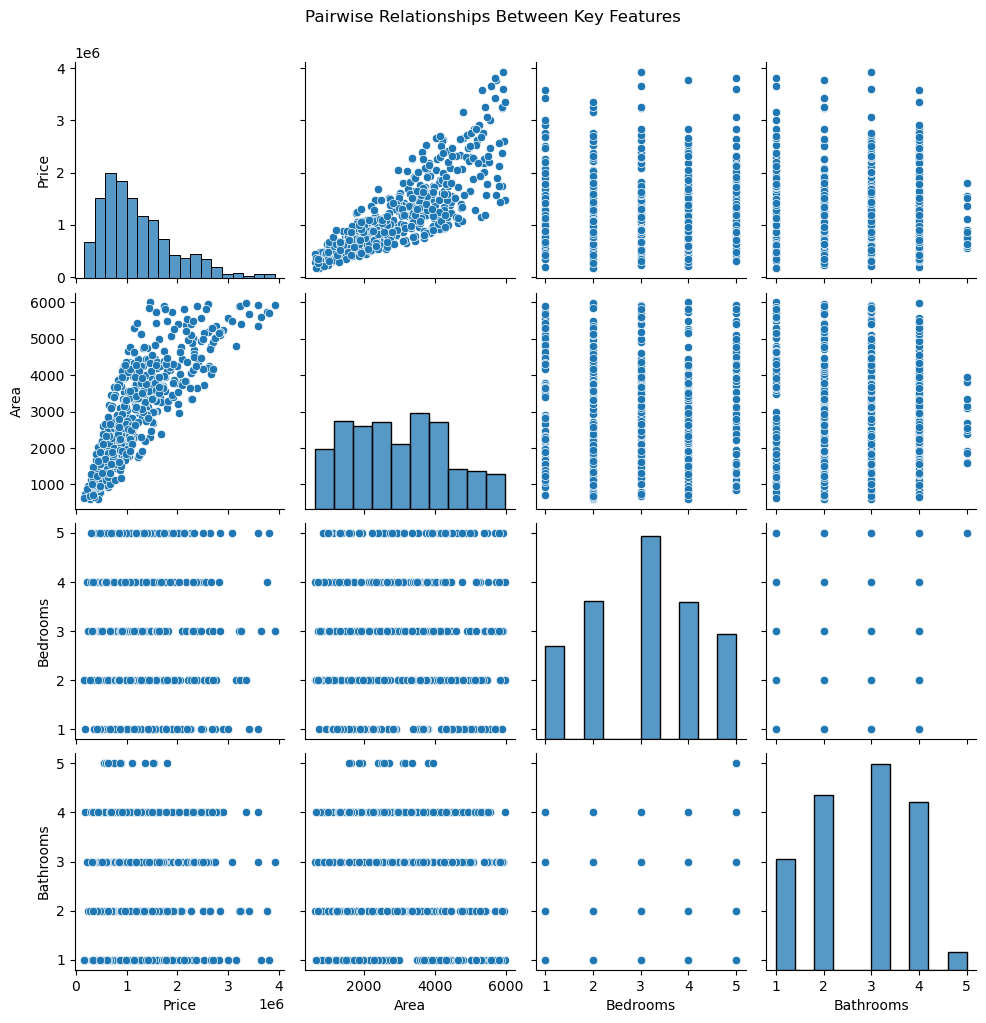

In [300]:
selected_features = ['Price', 'Area', 'Bedrooms', 'Bathrooms']
sns.pairplot(df_train[selected_features])
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02)
plt.show()


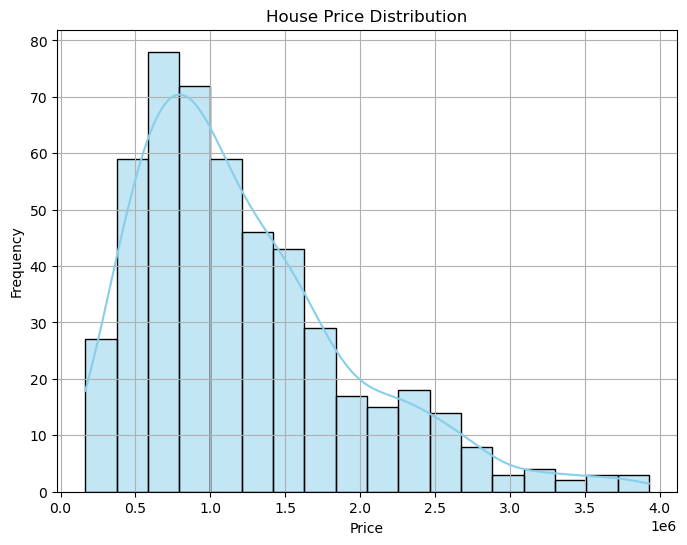

In [301]:
### Plotting the distribution of House Prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Since the graph is skewed

Text(0.5, 0, 'Log(Price + 1)')

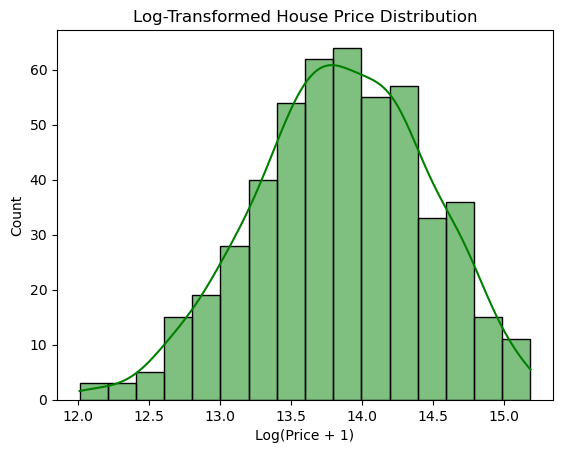

In [302]:
import numpy as np
sns.histplot(np.log1p(df['Price']), kde=True, color='green')
plt.title('Log-Transformed House Price Distribution')
plt.xlabel('Log(Price + 1)')


## Handling Missing Value


### Get The Null Value Percentage For Every Feature:


In [303]:
null_count=df.isnull().sum()
null_count

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
Location     0
Condition    0
Garage       0
Price        0
Age          0
dtype: int64

#### Since there are no NULL Values in all the columns 
#### Therefor we need not worry about Data Imputation

## Feature Transformation 

### Convert Numerical Feature To Categorical Feature 

### Convert Categorical Feature To Numerical Feature 


#### Location:

In [304]:
df['Location'].value_counts()

Location
Countryside      122
Suburb           118
Beachside        117
Downtown         103
Mountain View     40
Name: count, dtype: int64

In [305]:
df['Location'].unique()


array(['Suburb', 'Countryside', 'Beachside', 'Downtown', 'Mountain View'],
      dtype=object)

In [306]:
df['Location'] = df['Location'].astype(CategoricalDtype(categories=['Countryside','Suburb','Downtown','Mountain View','Beachside']

, ordered = True)).cat.codes

In [307]:
df['Location'].value_counts()

Location
0    122
1    118
4    117
2    103
3     40
Name: count, dtype: int64

In [308]:
df['Condition'].value_counts()

Condition
Good         144
Very Good     98
Fair          88
Excellent     86
Poor          84
Name: count, dtype: int64

In [309]:
df['Condition'].unique()

array(['Good', 'Very Good', 'Poor', 'Fair', 'Excellent'], dtype=object)

In [310]:
df['Condition'] = df['Condition'].astype(CategoricalDtype(categories=['Poor','Fair','Good','Very Good','Excellent']
, ordered = True)).cat.codes

In [311]:
df['Condition'].value_counts()

Condition
2    144
3     98
1     88
4     86
0     84
Name: count, dtype: int64

## On Hot Encoding For Nominal Categorical Data

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area       500 non-null    int64
 1   Bedrooms   500 non-null    int64
 2   Bathrooms  500 non-null    int64
 3   Floors     500 non-null    int64
 4   Location   500 non-null    int8 
 5   Condition  500 non-null    int8 
 6   Garage     500 non-null    int64
 7   Price      500 non-null    int64
 8   Age        500 non-null    int64
dtypes: int64(7), int8(2)
memory usage: 28.4 KB


In [313]:
df.head(2)

,Area,Bedrooms,Bathrooms,Floors,Location,Condition,Garage,Price,Age
0,3974,4,4,1,1,2,3,1283200,61
1,4307,3,3,2,0,3,1,1345509,52


In [314]:
# converting age into 4 categories
def age_category(age):
    if age <= 5:
        return 'new'
    elif age <= 20:
        return 'moderate'
    elif age <= 50:
        return 'old'
    else:
        return 'very old'

df['Age'] = df['Age'].apply(age_category)


In [315]:
#turning age(categorical) into age(integer)
df["Age"]=df["Age"].astype(CategoricalDtype(categories=["very old","old","moderate","new"], ordered=True)).cat.codes
df["Age"]=df["Age"].astype("int64")
df["Age"].unique()

array([0, 1, 2, 3], dtype=int64)

In [316]:
df_encod=df.copy()
object_features=df_encod.select_dtypes(include="object").columns.tolist()
print("Total Object data type features : ", len(object_features))
print("Features : \n ", object_features)

Total Object data type features :  0
Features : 
  []


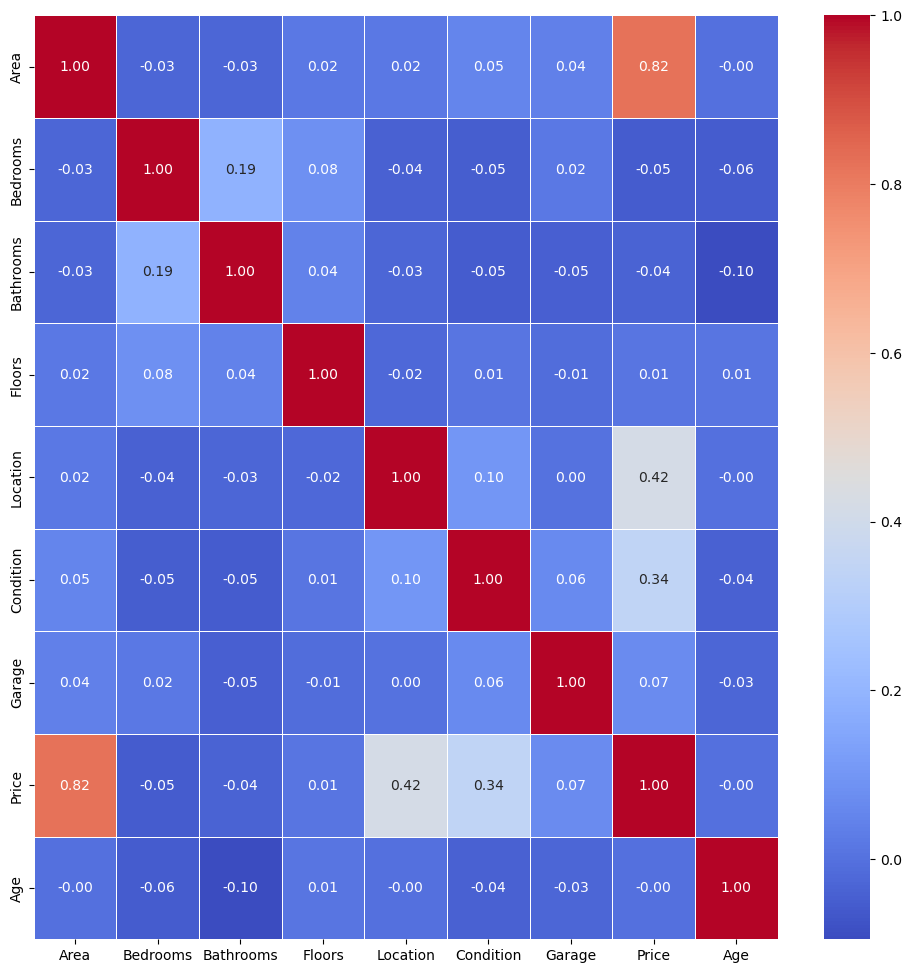

<Figure size 640x480 with 0 Axes>

In [319]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()
plt.savefig("EDA_img/heatmap.jpg")


## Split Data For Training And Testing

In [249]:
df_encod.shape

(500, 9)

In [268]:
y=df['Price']
x=df.drop(columns=['Price'])

In [251]:
len_train=df_train.shape[0]
len_train

500

In [252]:
x_train=df_encod[:len_train].drop("Price",axis=1)
y_train=df_encod["Price"][:len_train]
x_test=df_encod[len_train:].drop("Price",axis=1)
print("shape of x_train data:",x_train.shape)
print("shape of x_train data:",y_train.shape)
print("shape of x_test data:",x_test.shape)

shape of x_train data: (500, 8)
shape of x_train data: (500,)
shape of x_test data: (0, 8)


### Feature Scaling 

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area       500 non-null    int64
 1   Bedrooms   500 non-null    int64
 2   Bathrooms  500 non-null    int64
 3   Floors     500 non-null    int64
 4   Location   500 non-null    int8 
 5   Condition  500 non-null    int8 
 6   Garage     500 non-null    int64
 7   Price      500 non-null    int64
 8   Age        500 non-null    int64
dtypes: int64(7), int8(2)
memory usage: 28.4 KB


In [254]:
sc = StandardScaler()
sc.fit(x_train)
#Formula = z = (x-u)/s
x_train=sc.transform(x_train)
#x_test=sc.transform(x_test)

In [255]:
x_train[:3,:]

array([[ 0.69668871,  0.76830316,  1.1817557 , -1.01168112, -0.55591682,
        -0.02128053,  1.59434553, -1.14460089],
       [ 0.93622869, -0.02704173,  0.26281659,  0.79489231, -1.23057315,
         0.73873834, -0.28577892, -1.14460089],
       [-0.96786235, -0.02704173,  0.26281659,  0.79489231, -0.55591682,
        -1.54131825,  0.65428331,  0.06533663]])

### Train ML Models

In [256]:
#sgdregressor->Stochastic Gradient Descent Regressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

In [257]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
sgdr = SGDRegressor()


In [258]:
models = {
    "a": ["LinearRegression", lr],
    "b": ["DecisionTreeRegressor", dtr],
    "c": ["RandomForestRegressor", rfr],
    "d":["SGDRegressor", sgdr],
}

In [259]:
#KFold is used for how many parts we want of the x_train data 
#here c_splits = 7 so the data gets splitted into 7 parts and 1 part is tested and others are trained 

from sklearn.model_selection import KFold, cross_val_score
#cross_val_score divides the data into multiple parts
from sklearn.metrics import make_scorer, r2_score

def test_model(model, x_train=x_train, y_train=y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [260]:
models_score = []
for model in models:
    print("Training model : ", models[model][0])
    score = test_model(models[model][1], x_train, y_train)
    print("Score of model : ", score)
    models_score.append([models[model][0], score[0]])

Training model :  LinearRegression
Score of model :  [0.895352553173753]
Training model :  DecisionTreeRegressor
Score of model :  [0.8994665965287492]
Training model :  RandomForestRegressor
Score of model :  [0.9570081891256559]
Training model :  SGDRegressor
Score of model :  [0.8951402766414404]


In [261]:
models_score

[['LinearRegression', 0.895352553173753],
 ['DecisionTreeRegressor', 0.8994665965287492],
 ['RandomForestRegressor', 0.9570081891256559],
 ['SGDRegressor', 0.8951402766414404]]

#### Plotting the difference between Models

In [276]:
# Convert model scores into DataFrame for plotting
model_scores_df = pd.DataFrame(models_score, columns=["Model", "R2 Score"])


C:\Users\anshu\AppData\Local\Temp\ipykernel_10152\3755820479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_scores_df, x="Model", y="R2 Score", palette="viridis")


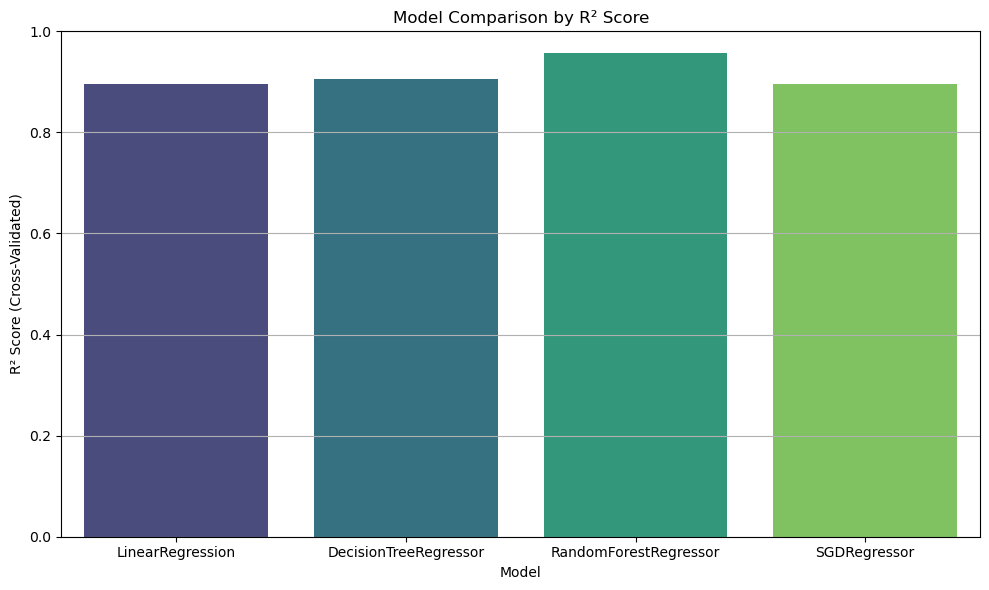

In [277]:
plt.figure(figsize=(10, 6))
sns.barplot(data=model_scores_df, x="Model", y="R2 Score", palette="viridis")
plt.title("Model Comparison by R² Score")
plt.ylabel("R² Score (Cross-Validated)")
plt.xlabel("Model")
plt.ylim(0, 1)  # Assuming R² is between 0 and 1
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## Actual v/s Predicted Price

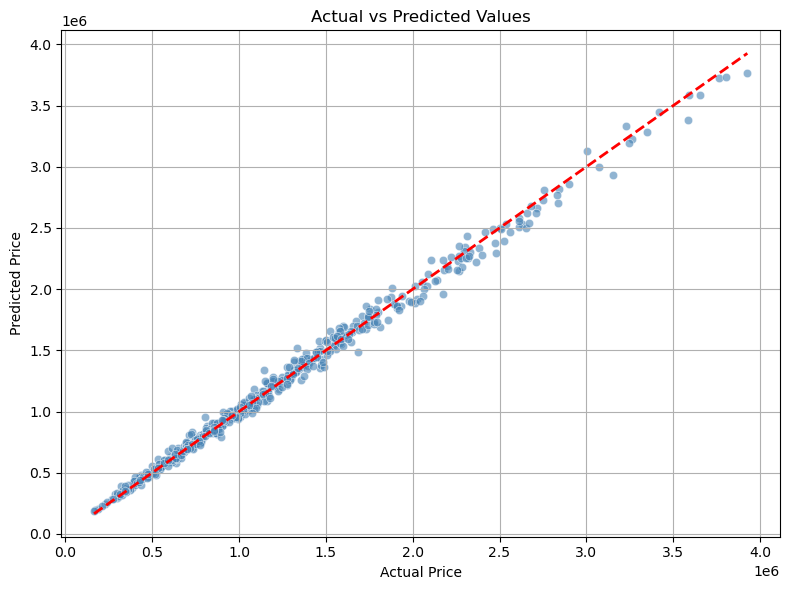

In [278]:
# Predict on training data
y_pred = best_model.predict(x_train)

# Create DataFrame for plotting
comparison_df = pd.DataFrame({
    "Actual": y_train,
    "Predicted": y_pred
})

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Actual", y="Predicted", data=comparison_df, color="steelblue", alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # perfect prediction line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Cheching feature importance of tree based graphs

In [262]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

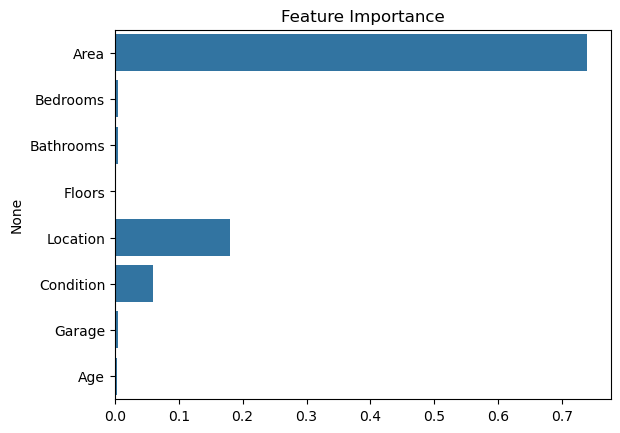

In [263]:
model = models['c'][1]  # Get the RandomForestRegressor object
importances = model.feature_importances_

feature_names = df.drop('Price', axis=1).columns  # or whatever your target column is

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()




In [264]:
print(x_test.shape)


(0, 8)


###### Recreating the train/test Split

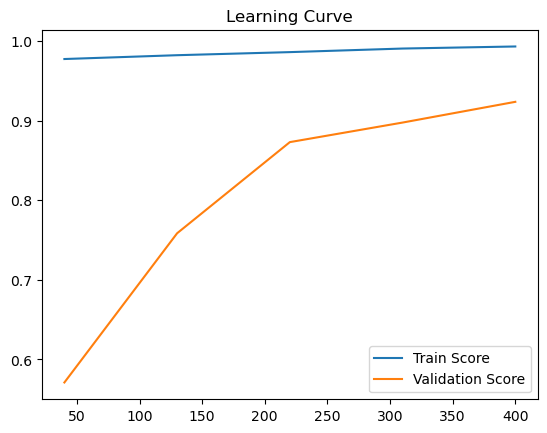

In [212]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.title("Learning Curve")
plt.legend()


### Conclusion
#### Good learning behavior — our model improves with more data.

#### Still a small gap at 400 samples, suggesting slight overfitting.



# Finalising and Predicting The Price

In [269]:
import pickle
import os

# Define the path
save_path = r'F:\AI_FINAL'

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save scaler
with open(os.path.join(save_path, 'scaler.pkl'), 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)

# Save model
with open(os.path.join(save_path, 'model.pkl'), 'wb') as model_file:
    pickle.dump(lr, model_file)
 

In [270]:
# Define the path
load_path = r'F:\AI_FINAL'



In [271]:
x.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'Location', 'Condition',
       'Garage', 'Age'],
      dtype='object')

In [274]:
from sklearn.exceptions import NotFittedError

models_score = []
best_model = None
best_score = -np.inf
best_model_name = ""

for key in models:
    model_name, model_instance = models[key]
    print(f"Training model: {model_name}")
    score = test_model(model_instance, x_train, y_train)
    print(f"Score of model: {score[0]}")
    models_score.append([model_name, score[0]])

    if score[0] > best_score:
        best_score = score[0]
        best_model = model_instance
        best_model_name = model_name

# ✅ Fit the best model AFTER selection
best_model.fit(x_train, y_train)

print(f"\n✅ Best model: {best_model_name} with R2 Score: {best_score:.4f}")

# Save the best model and the scaler
with open(os.path.join(save_path, 'scaler.pkl'), 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)

with open(os.path.join(save_path, 'model.pkl'), 'wb') as model_file:
    pickle.dump(best_model, model_file)


Training model: LinearRegression
Score of model: 0.895352553173753
Training model: DecisionTreeRegressor
Score of model: 0.9047483656964369
Training model: RandomForestRegressor
Score of model: 0.9568777527294653
Training model: SGDRegressor
Score of model: 0.8951144323055067

✅ Best model: RandomForestRegressor with R2 Score: 0.9569


In [275]:
# Load the model and scaler
with open(os.path.join(load_path, 'scaler.pkl'), 'rb') as s:
    scaler = pickle.load(s)

with open(os.path.join(load_path, 'model.pkl'), 'rb') as m:
    model = pickle.load(m)

# Predict on new data
new_data = [[4244,1,1,1,3,2,2,2]]  # Example
new_scaled = scaler.transform(new_data)
print("Predicted price:", model.predict(new_scaled)[0])



Predicted price: 1652446.63


C:\Users\anshu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
